In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
pb = np.load('out.npy')
pb.shape

(40669, 17)

In [3]:
df = pd.read_csv('sample_submission.csv')
df.head()

,image_name,tags
0,test_0,primary clear agriculture road water
1,test_1,primary clear agriculture road water
2,test_2,primary clear agriculture road water
3,test_3,primary clear agriculture road water
4,test_4,primary clear agriculture road water


In [4]:
tr = np.load('../data/npydata/imgs_label_train.npy')
tr.shape

(40479, 17)

In [5]:
label = ['agriculture','artisinal_mine','bare_ground','blooming','blow_down','clear','cloudy','conventional_mine','cultivation','habitation','haze','partly_cloudy','primary','road','selective_logging','slash_burn','water']

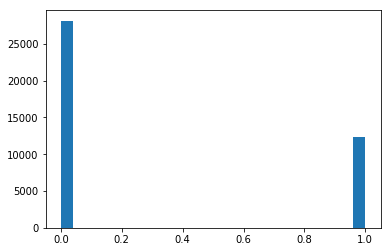

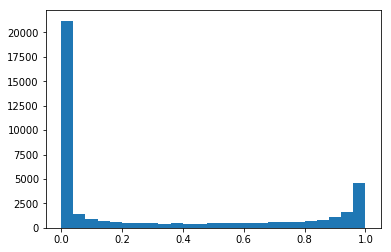

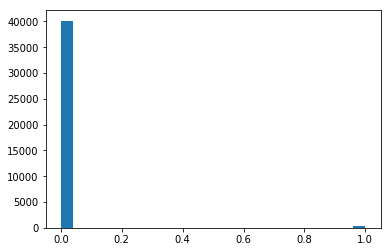

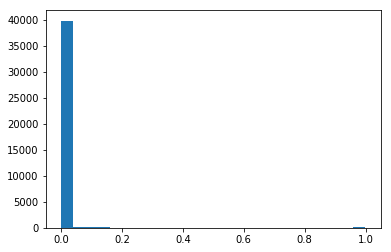

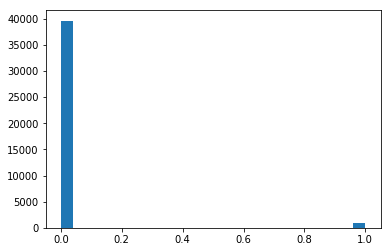

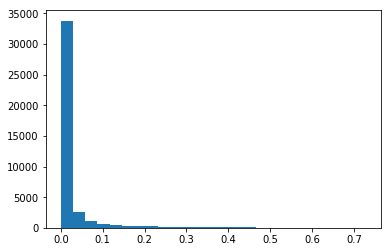

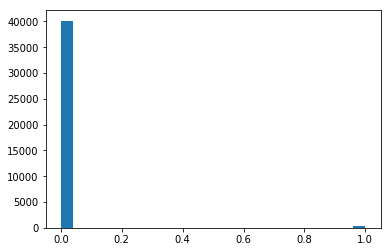

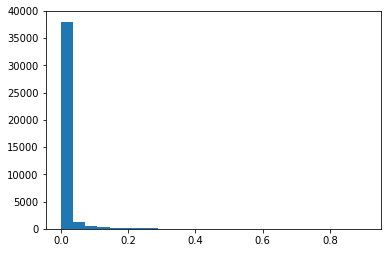

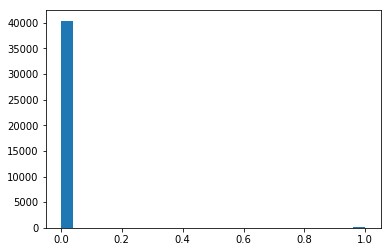

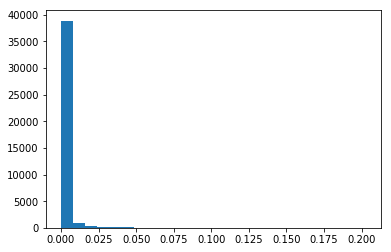

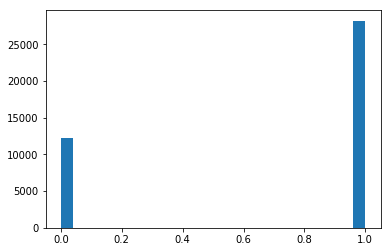

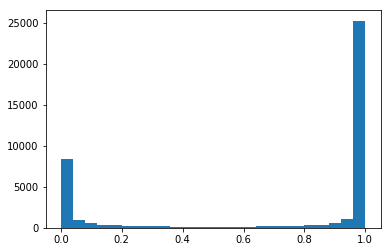

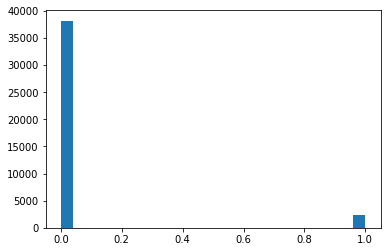

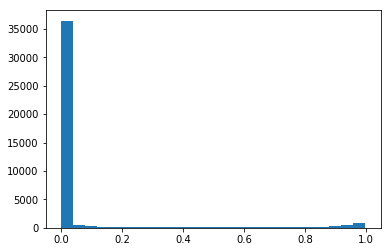

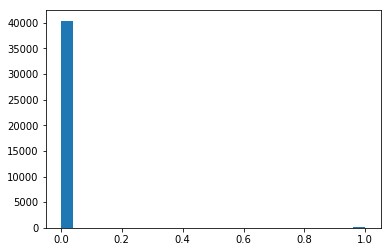

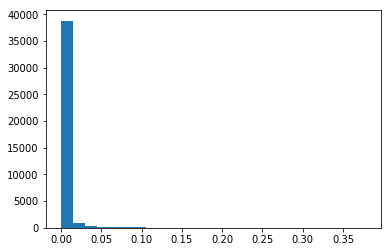

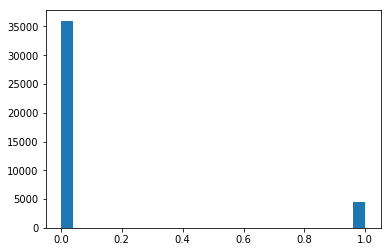

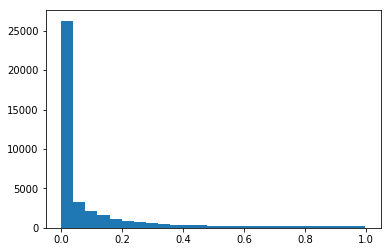

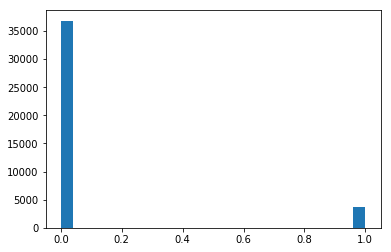

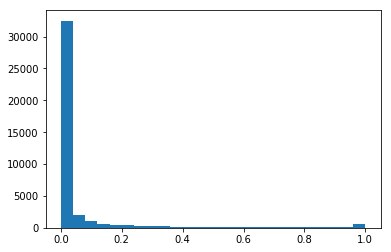

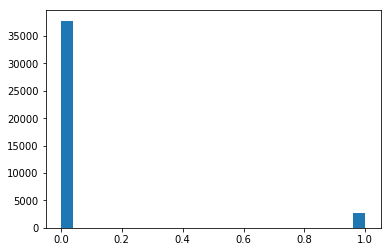

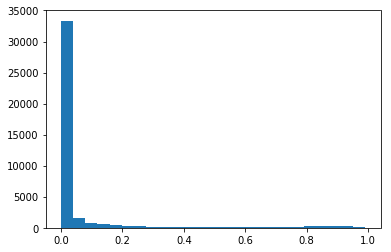

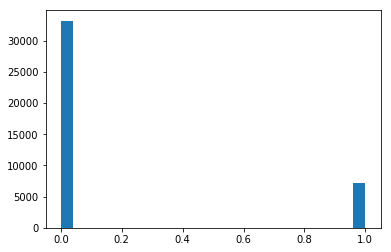

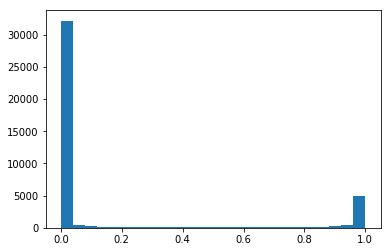

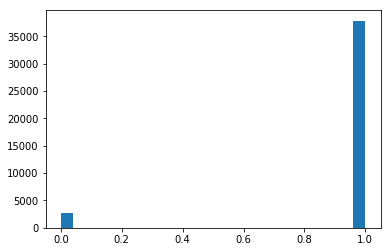

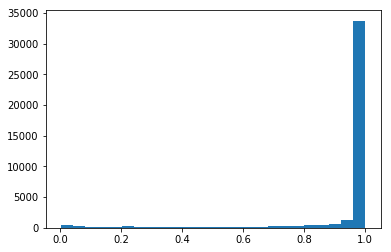

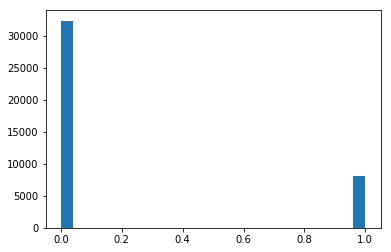

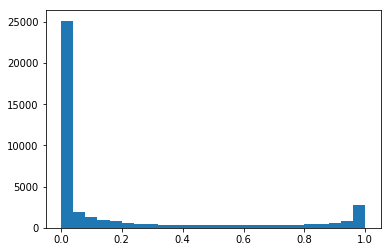

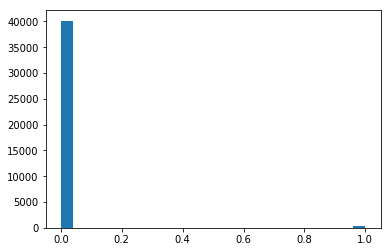

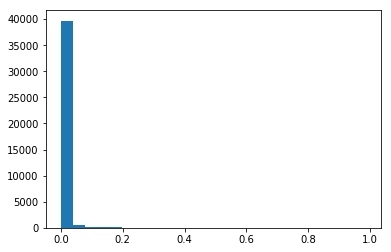

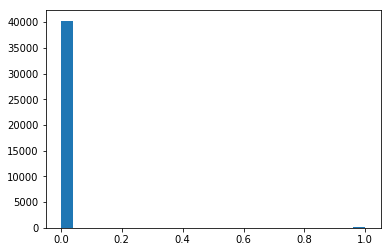

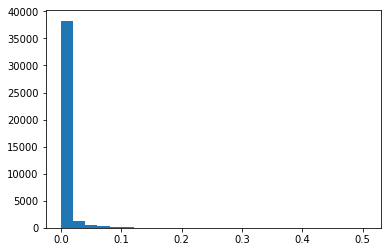

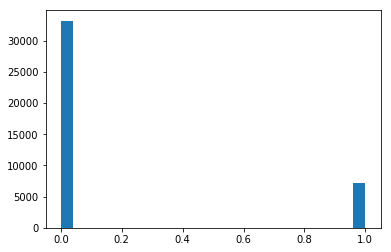

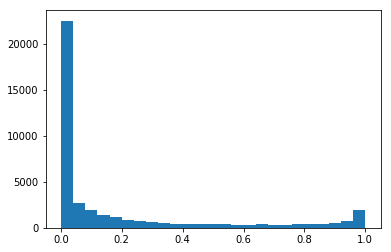

In [6]:
for i in range(17):
    tra = tr[:,i]
    plt.hist(tra, bins=25)
    plt.show()
    agri = pb[:,i]
    plt.hist(agri, bins=25)
    plt.show()

In [13]:
threshold = []
for i in range(17):
    negnum = 40669 - int((np.sum(tr[:,i])/40479)*40669)
    #print negnum
    arr = np.sort(pb[:,i])
    th = arr[negnum]
    print th
    threshold.append(th)

0.523085
0.400951
0.262491
0.221468
0.0720905
0.638604
0.624583
0.146802
0.29129
0.221524
0.409095
0.263002
0.487811
0.434411
0.135253
0.11079
0.439986


In [16]:
for i in range(40669):
    tmppb = pb[i,:]
    tmplabel = ""
    for j in range(17):
        if(tmppb[j] > threshold[j]):
            tmplabel = tmplabel + label[j] + " "
    tmplabel = tmplabel.strip()
    df['tags'][i] = tmplabel

In [17]:
df.to_csv('submit.csv')